In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score

In [2]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')

In [3]:
train = train_org.copy()
test = test_org.copy()

In [4]:
train.shape, test.shape

((233154, 41), (112392, 40))

0    182543
1     50611
Name: loan_default, dtype: int64


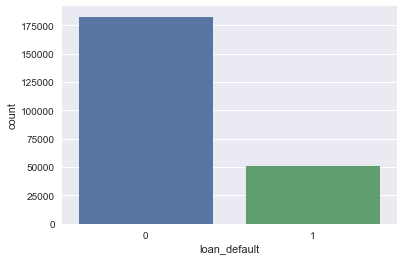

In [5]:
print(train['loan_default'].value_counts())
sns.countplot(train['loan_default'])

Random under-sampling:
1    182543
0    182543
Name: loan_default, dtype: int64


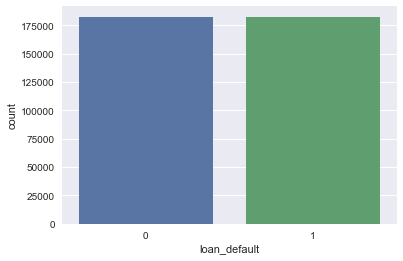

In [6]:
count_class_0, count_class_1 = train['loan_default'].value_counts()

train_class_0 = train[train['loan_default'] == 0]    # 182543
train_class_1 = train[train['loan_default'] == 1]    # 50611

train_class_1_over = train_class_1.sample(count_class_0, replace=True)
train = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random under-sampling:')
print(train['loan_default'].value_counts())

sns.countplot(train['loan_default'])

In [7]:
train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [8]:
test.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [9]:
# Train - Convert to Categorical data-type
cat_att = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
           'loan_default',
#          'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employee_code_ID', 'branch_id', 'State_ID'
          ]
train[cat_att] = train[cat_att].astype('object')

# Train - Convert to Date data-type
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])   #, format='%d/%m/%Y')

# Train - Convert to Integer data-type
#int_att = ['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']
#train[int_att] = train[int_att].astype('int')
train['ltv'] = train['ltv'].astype('int64')

In [10]:
# Test - Convert to Categorical data-type
cat_att = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 
#          'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employee_code_ID', 'branch_id', 'State_ID'
          ]
test[cat_att] = test[cat_att].astype('object')

# Test - Convert to Date data-type
test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'])
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])

# Test - Convert to Integer data-type
#int_att = ['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']
#test[int_att] = test[int_att].astype('int64')
test['ltv'] = test['ltv'].astype('int64')

In [11]:
# Drop UniqueID, MobileNo_Avl_Flag, PERFORM_CNS.SCORE
train.drop(['UniqueID', 'MobileNo_Avl_Flag', 'PERFORM_CNS.SCORE'], axis=1, inplace=True)
test.drop(['UniqueID', 'MobileNo_Avl_Flag', 'PERFORM_CNS.SCORE'], axis=1, inplace=True)

In [12]:
# Train - Fill missing values
print(train.isnull().sum())
print('-------------------------------------------')

train['Employment.Type'].fillna(train['Employment.Type'].mode()[0], inplace=True)

print(train.isnull().sum())

disbursed_amount                           0
asset_cost                                 0
ltv                                        0
branch_id                                  0
supplier_id                                0
manufacturer_id                            0
Current_pincode_ID                         0
Date.of.Birth                              0
Employment.Type                        11869
DisbursalDate                              0
State_ID                                   0
Employee_code_ID                           0
Aadhar_flag                                0
PAN_flag                                   0
VoterID_flag                               0
Driving_flag                               0
Passport_flag                              0
PERFORM_CNS.SCORE.DESCRIPTION              0
PRI.NO.OF.ACCTS                            0
PRI.ACTIVE.ACCTS                           0
PRI.OVERDUE.ACCTS                          0
PRI.CURRENT.BALANCE                        0
PRI.SANCTI

In [13]:
# Test - Fill missing values
print(test.isnull().sum())
print('-------------------------------------------')

test['Employment.Type'].fillna(test['Employment.Type'].mode()[0], inplace=True)

print(test.isnull().sum())

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT           

In [14]:
# Calculate Age for Date.of.Birth variable
now = pd.to_datetime('now')

train['Age'] = (now - train['Date.of.Birth']).astype('<m8[Y]').astype('int64')
test['Age'] = (now - test['Date.of.Birth']).astype('<m8[Y]').astype('int64')

train['Age'].loc[train.Age < 0] = train['Age'].loc[train.Age < 0] + 100
test['Age'].loc[test.Age < 0] = test['Age'].loc[test.Age < 0] + 100

train.drop('Date.of.Birth', axis=1, inplace=True)
test.drop('Date.of.Birth', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# Calculate Days for DisbursalDate variable
now = pd.to_datetime('now')

train['DisbursalDay'] = (now - train['DisbursalDate']).astype('<m8[D]').astype('int64')
test['DisbursalDay'] = (now - test['DisbursalDate']).astype('<m8[D]').astype('int64')

train.drop('DisbursalDate', axis=1, inplace=True)
test.drop('DisbursalDate', axis=1, inplace=True)

In [16]:
# Handle AVERAGE.ACCT.AGE variable
df = pd.DataFrame(train['AVERAGE.ACCT.AGE'].str.split(' ').tolist(), columns = ['years', 'months'])
train['AVERAGE.ACCT.AGE'] = df['years'].str.extract('(\d+)').astype('int64')*12 + df['months'].str.extract('(\d+)').astype('int64')

df = pd.DataFrame(test['AVERAGE.ACCT.AGE'].str.split(' ').tolist(), columns = ['years', 'months'])
test['AVERAGE.ACCT.AGE'] = df['years'].str.extract('(\d+)').astype('int64')*12 + df['months'].str.extract('(\d+)').astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [17]:
# Handle CREDIT.HISTORY.LENGTH variables
df1 = pd.DataFrame(train['CREDIT.HISTORY.LENGTH'].str.split(' ').tolist(), columns = ['years', 'months'])
train['CREDIT.HISTORY.LENGTH'] = df1['years'].str.extract('(\d+)').astype('int64')*12 + df1['months'].str.extract('(\d+)').astype('int64')

df1 = pd.DataFrame(test['CREDIT.HISTORY.LENGTH'].str.split(' ').tolist(), columns = ['years', 'months'])
test['CREDIT.HISTORY.LENGTH'] = df1['years'].str.extract('(\d+)').astype('int64')*12 + df1['months'].str.extract('(\d+)').astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [18]:
# Handle negative values for PRI.CURRENT.BALANCE, SEC.CURRENT.BALANCE variables
train['PRI.CURRENT.BALANCE'].loc[train['PRI.CURRENT.BALANCE'] < 0] = 0
test['PRI.CURRENT.BALANCE'].loc[test['PRI.CURRENT.BALANCE'] < 0] = 0

train['SEC.CURRENT.BALANCE'].loc[train['SEC.CURRENT.BALANCE'] < 0] = 0
test['SEC.CURRENT.BALANCE'].loc[test['SEC.CURRENT.BALANCE'] < 0] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
train_cat = train.select_dtypes(include=['object']).columns
train_num = train.select_dtypes(include=['int64']).columns

test_cat = test.select_dtypes(include=['object']).columns
test_num = test.select_dtypes(include=['int64']).columns

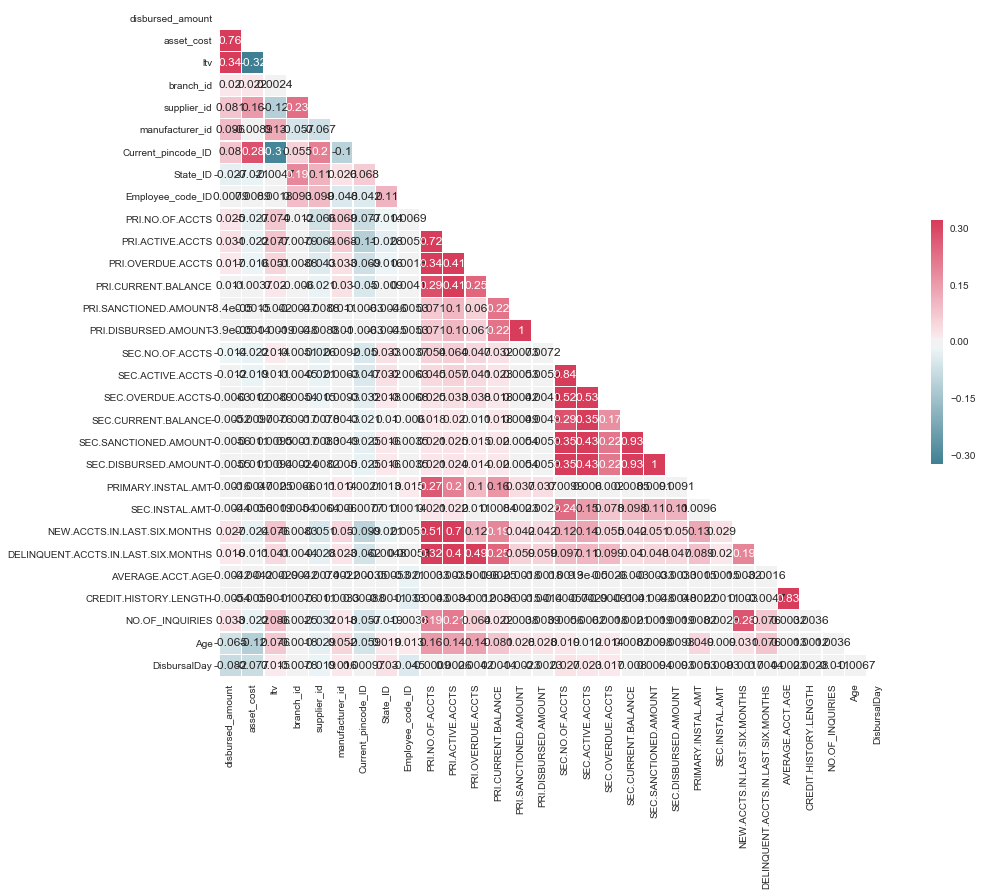

In [20]:
# Correlation Plot of Numeric attributes
sns.set(style="white")

corr = train[train_num].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

corr.style.background_gradient().set_precision(2)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, annot=True,
            linewidths=.5, cbar_kws={"shrink": .3})

In [21]:
# Drop SEC.DISBURSED.AMOUNT, PRI.DISBURSED.AMOUNT, disbursed_amount
drop_att = ['SEC.DISBURSED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.ACTIVE.ACCTS', 'PRI.ACTIVE.ACCTS', 
            'SEC.SANCTIONED.AMOUNT', 'CREDIT.HISTORY.LENGTH', 
#            'disbursed_amount', 'PRI.NO.OF.ACCTS',
#            'PRI.OVERDUE.ACCTS', 'SEC.NO.OF.ACCTS', 'PRI.CURRENT.BALANCE'
           ]
train.drop(drop_att, axis=1, inplace=True)
test.drop(drop_att, axis=1, inplace=True)

In [22]:
# Unimportant variables from RF
drop_att = ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employee_code_ID', 'State_ID', 
            'PERFORM_CNS.SCORE.DESCRIPTION', 
#            'PAN_flag', 'Driving_flag', 'Passport_flag',
#            'SEC.CURRENT.BALANCE', 'SEC.INSTAL.AMT', 'SEC.OVERDUE.ACCTS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
#            'SEC.NO.OF.ACCTS'
           ]
train.drop(drop_att, axis=1, inplace=True)
test.drop(drop_att, axis=1, inplace=True)

In [23]:
train_cat = train.select_dtypes(include=['object']).columns
train_num = train.select_dtypes(include=['int64']).columns

test_cat = test.select_dtypes(include=['object']).columns
test_num = test.select_dtypes(include=['int64']).columns

print('Categorical:', train[train_cat].shape, test[test_cat].shape)
print('Numeric    :', train[train_num].shape, test[test_num].shape)

Categorical: (365086, 7) (112392, 6)
Numeric    : (365086, 18) (112392, 18)


In [24]:
train.dtypes

disbursed_amount                        int64
asset_cost                              int64
ltv                                     int64
Employment.Type                        object
Aadhar_flag                            object
PAN_flag                               object
VoterID_flag                           object
Driving_flag                           object
Passport_flag                          object
PRI.NO.OF.ACCTS                         int64
PRI.OVERDUE.ACCTS                       int64
PRI.CURRENT.BALANCE                     int64
PRI.SANCTIONED.AMOUNT                   int64
SEC.NO.OF.ACCTS                         int64
SEC.OVERDUE.ACCTS                       int64
SEC.CURRENT.BALANCE                     int64
PRIMARY.INSTAL.AMT                      int64
SEC.INSTAL.AMT                          int64
NEW.ACCTS.IN.LAST.SIX.MONTHS            int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     int64
AVERAGE.ACCT.AGE                        int64
NO.OF_INQUIRIES                   

In [26]:
# Dummify Categorical variables
train_cat_dummy = train[train_cat].drop('loan_default', axis=1)

train_cat_dummy = pd.get_dummies(train_cat_dummy, columns=train_cat_dummy.columns)
test_cat_dummy = pd.get_dummies(test[test_cat], columns=test[test_cat].columns)

train_cat_dummy.shape, test_cat_dummy.shape

((365086, 12), (112392, 12))

In [30]:
# Standarding Numeric variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_num_scaled = pd.DataFrame(scaler.fit_transform(train[train_num]), columns=train[train_num].columns)
test_num_scaled = pd.DataFrame(scaler.fit_transform(test[test_num]), columns=test[test_num].columns)

#train_num_scaled = train[train_num]
#test_num_scaled = test[test_num]

train_num_scaled.shape, test_num_scaled.shape

((365086, 18), (112392, 18))

In [31]:
train_num_scaled.shape, train_cat_dummy.shape

((365086, 18), (365086, 12))

In [32]:
test_num_scaled.shape, test_cat_dummy.shape

((112392, 18), (112392, 12))

In [33]:
train_num_scaled.reset_index(drop=True, inplace=True)
train_cat_dummy.reset_index(drop=True, inplace=True)

In [34]:
# Combine both Categorical Dummy and Standardized Numeric Variables
train_final = pd.concat([train_num_scaled, train_cat_dummy], axis=1)
test_final = pd.concat([test_num_scaled, test_cat_dummy], axis=1)

train_final.shape, test_final.shape

((365086, 30), (112392, 30))

In [35]:
train_cat_dummy.columns.difference(test_cat_dummy.columns)

Index([], dtype='object')

In [36]:
test_cat_dummy.columns.difference(train_cat_dummy.columns)

Index([], dtype='object')

In [37]:
# To check the difference of columns in Train and Test data-sets
for column in train_final.columns:
    if column not in test_final.columns:
        test_final[column] = 0

for column in test_final.columns:
    if column not in train_final.columns:
        train_final[column] = 0
        
print(train_final.columns.difference(test_final.columns))
print(test_final.columns.difference(train_final.columns))

train_final.shape, test_final.shape

Index([], dtype='object')
Index([], dtype='object')


((365086, 30), (112392, 30))

In [38]:
X = train_final
y = train['loan_default'].astype('int64')

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=898)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(255560, 30)
(255560,)
(109526, 30)
(109526,)


In [41]:
test_final.shape

(112392, 30)

In [42]:
#train_final.to_excel('train_final.xlsx', index=False)

## Model Building

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(C=0.1, max_iter=100, penalty='l1', n_jobs=-1, random_state=234234)

model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_log.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_log))

Train:      0.5847746126154327
Validation: 0.5831674670854409


In [44]:
test_pred_log = model_log.predict(test_final)

#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=8, )

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_rf.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_rf))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train:      0.6119267491000157
Validation: 0.6039844420502894


In [46]:
test_pred_rf = model_rf.predict(test_final)

In [47]:
pd.DataFrame({'Features' : X_train.columns,
              'Scores'   : model_rf.feature_importances_*100 
             }).sort_values('Scores', ascending=False)

,Features,Scores
2,ltv,21.016830
0,disbursed_amount,17.837362
6,PRI.SANCTIONED.AMOUNT,8.171596
4,PRI.OVERDUE.ACCTS,7.270428
5,PRI.CURRENT.BALANCE,5.634241
1,asset_cost,5.287174
3,PRI.NO.OF.ACCTS,4.834841
17,DisbursalDay,4.696512
13,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,3.249365
15,NO.OF_INQUIRIES,3.048091


#### Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model_bag = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, n_jobs=-1, random_state=2344)

model_bag.fit(X_train, y_train)

y_pred_bag = model_bag.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_bag.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_bag))

Train:      0.6455744247926123
Validation: 0.6240162153278673


In [49]:
test_pred_bag = model_bag.predict(test_final)

#### AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=12345)

model_ada.fit(X_train, y_train)

y_pred_ada = model_rf.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_ada.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_ada))

Train:      0.5876702144310534
Validation: 0.6039844420502894


In [51]:
test_pred_ada = model_ada.predict(test_final)

#### GBM

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier(learning_rate=1, n_estimators=100)

model_gbm.fit(X_train, y_train)

y_pred_gbm = model_gbm.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_gbm.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_gbm))

Train:      0.6225974330881202
Validation: 0.6089969504957727


In [ ]:
test_pred_gbm = model_gbm.predict(test_final)

#### XgBoost

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

# Accuracy
print('Train:     ', accuracy_score(y_train, model_xgb.predict(X_train)))
print('Validation:', accuracy_score(y_val, y_pred_xgb))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
test_pred_xgb = model_xgb.predict(test_final)

#### Submission

In [ ]:
submission = pd.DataFrame({'UniqueID' : test_org.UniqueID,
                           'loan_default' : test_pred_rf
                          })

In [ ]:
submission.to_csv('submission_log.csv', index=False)